In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])
df.head()


#For Decomposing Time Series
miles_decomp_df = df.copy()

#For Differencing
miles_df = miles_decomp_df.copy()


<AxesSubplot:>

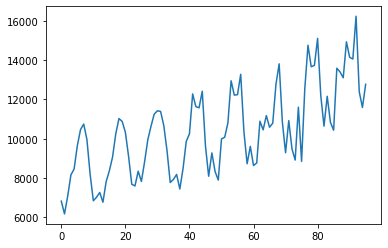

In [2]:
df['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

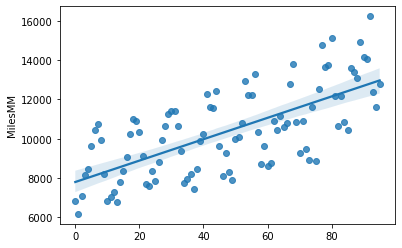

In [3]:
sns.regplot(x=df.index.values, y=df['MilesMM'])

### Removing Seasonality

In [4]:
df['year'] = df['Month'].dt.year
df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [5]:
df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='year'>

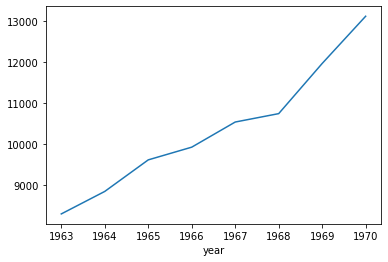

In [6]:
df.groupby('year')['MilesMM'].mean().plot()

### Creating Lag plots

In [7]:
df['lag1'] =  df['MilesMM'].shift(1)

<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

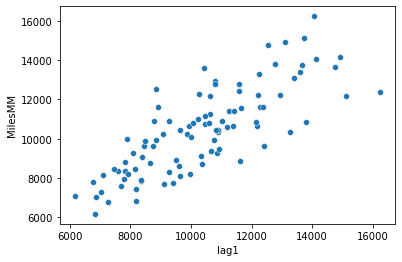

In [8]:
sns.scatterplot(x=df['lag1'], y=df['MilesMM'])

In [9]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

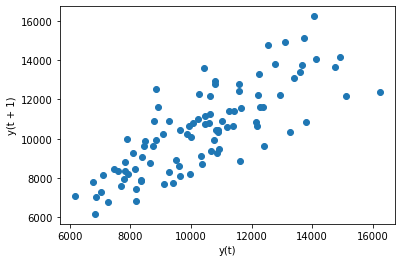

In [10]:
lag_plot(df['MilesMM'])

### Autocorrelation Plots

In [11]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

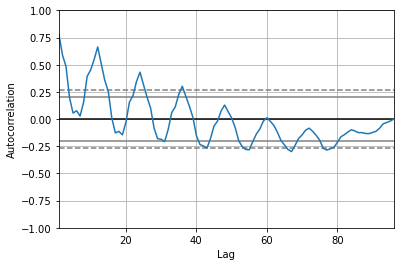

In [12]:
autocorrelation_plot(df['MilesMM'])

## Downsampling and Upsampling

In [13]:
#DownSamppling

quarterly_df = df.resample('Q', on='Month').mean()

quarterly_df.head()

,MilesMM,year,lag1
Month,,,
1963-03-31,6696.333333,1963.0,6502.500000
1963-06-30,8756.000000,1963.0,7902.666667
1963-09-30,10392.333333,1963.0,10286.000000
1963-12-31,7356.333333,1963.0,8335.000000
1964-03-31,7287.666667,1964.0,7023.666667


In [14]:
yearly_df = df.resample('A', on='Month').sum()

yearly_df.head()

,MilesMM,year,lag1
Month,,,
1963-12-31,99603,23556,92576.0
1964-12-31,106192,23568,105617.0
1965-12-31,115431,23580,115100.0
1966-12-31,119154,23592,117807.0
1967-12-31,126515,23604,126181.0


<AxesSubplot:xlabel='Month'>

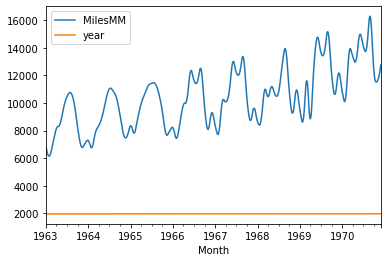

In [15]:
# Upsampling

upsampled_df = df.resample('D', on='Month').mean()


#filling null values of the data
interpolated_df = upsampled_df.interpolate(method='linear')


# Smoothening sharp curves in plot
poly_interpolated_df = upsampled_df.interpolate(method='spline', order=2)
poly_interpolated_df.drop(columns=["lag1"], inplace=True)
poly_interpolated_df.plot()

## Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

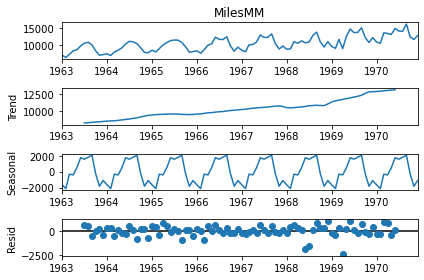

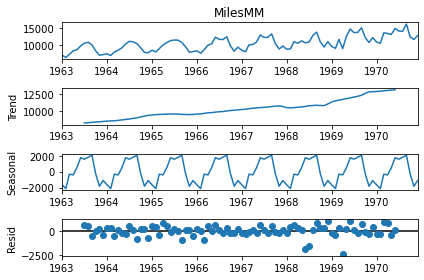

In [17]:
miles_decomp_df.head()

#Additive order
miles_decomp_df.index = miles_decomp_df['Month'] 
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')
result.plot()


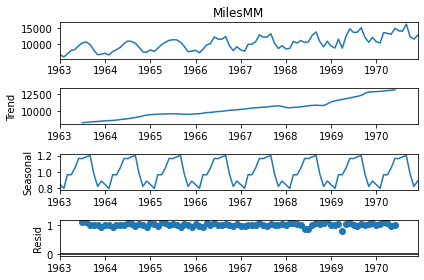

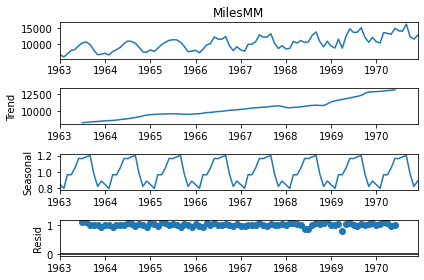

In [18]:
#Multiplicative Model

result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')
result2.plot()

### Differencing

In [19]:
#Creating Lags

miles_df['lag1'] =  miles_df['MilesMM'].shift(1)
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)
miles_df.head()


,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


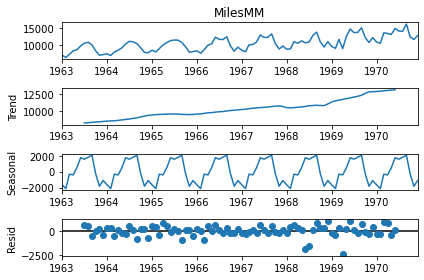

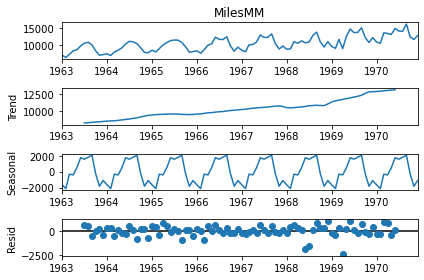

In [20]:
miles_df.index = miles_df['Month'] 
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()


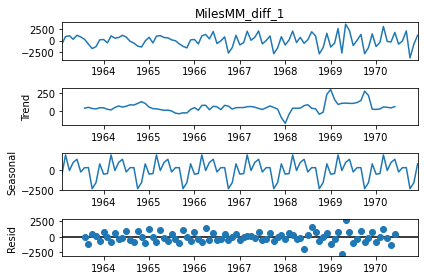

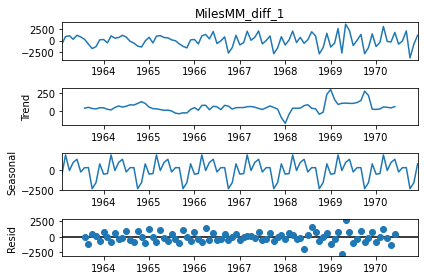

In [21]:
miles_df.index = miles_df['Month'] 
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()


<AxesSubplot:xlabel='Month'>

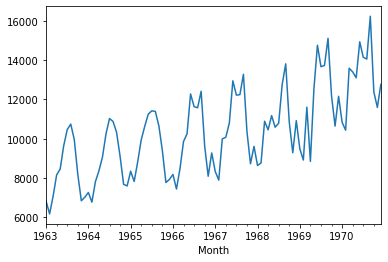

In [22]:
miles_df['MilesMM'].plot()

<AxesSubplot:xlabel='Month'>

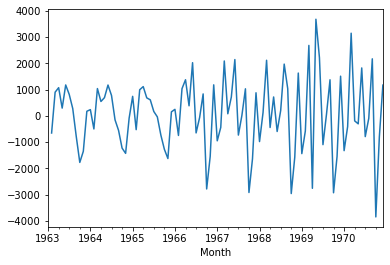

In [23]:
miles_df['MilesMM_diff_1'].plot()

<AxesSubplot:xlabel='Month'>

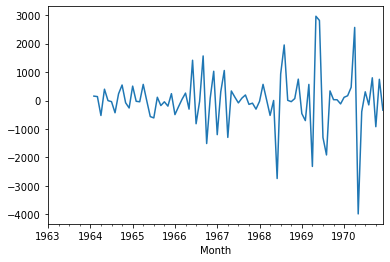

In [24]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)
miles_df['MilesMM_diff_12'].plot()

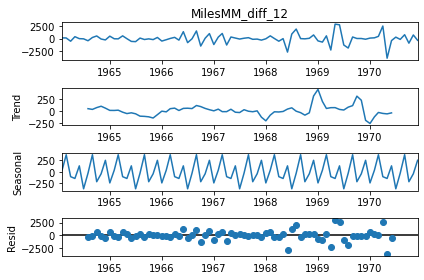

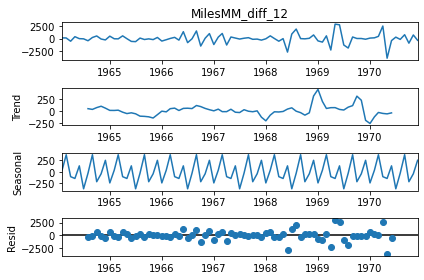

In [25]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot()

## SARIMA or Seasonal ARIMA 

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
df1 = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])
df1.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


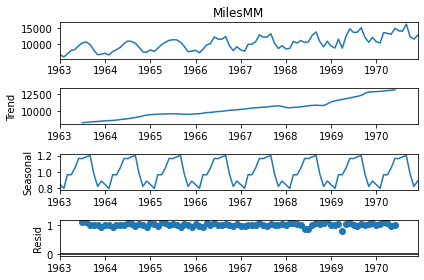

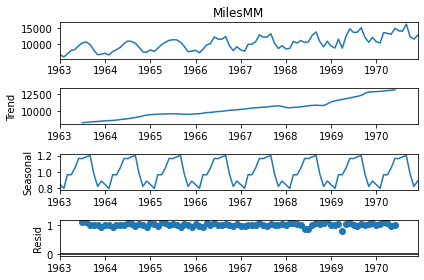

In [27]:
df.index = df['Month']
result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

In [28]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [29]:
model_fit = model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

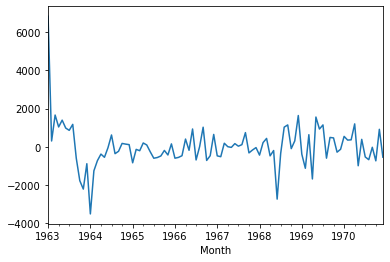

In [30]:
residuals = model_fit.resid
residuals.plot()

In [31]:
output = model_fit.forecast()
output

1971-01-01    11475.896069
Freq: MS, dtype: float64

In [32]:
model_fit.forecast(12)

1971-01-01    11475.896069
1971-02-01    11153.502300
1971-03-01    13669.509349
1971-04-01    12647.368334
1971-05-01    14338.994360
1971-06-01    15786.400730
1971-07-01    14979.200026
1971-08-01    15362.174645
1971-09-01    16962.867549
1971-10-01    13682.105221
1971-11-01    12426.901265
1971-12-01    13730.128736
Freq: MS, Name: predicted_mean, dtype: float64

In [33]:
yhat = model_fit.predict()
yhat.head()

1963-01-01       0.000000
1963-02-01    5872.059263
1963-03-01    5422.255546
1963-04-01    7122.548182
1963-05-01    7067.360265
Freq: MS, Name: predicted_mean, dtype: float64

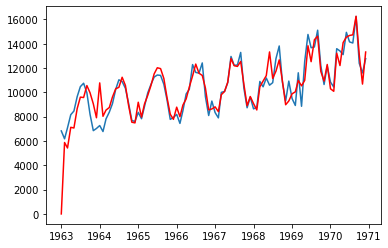

In [34]:
plt.plot(df['MilesMM'])
plt.plot(yhat, color='red')